In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [2]:
N = 64
p = 3

solver = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vx=1, xp=xp
    ),
    nx=N,
    p=p,
    ZS=True,
    adaptive_dt=False,
    CFL=1 / 6,
)
solver.run(1.0)

100%|██████████| 1.0/1.0 [00:01]                  


In [3]:
np.min(solver.minisnapshots["min_rho"]), np.max(solver.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0))

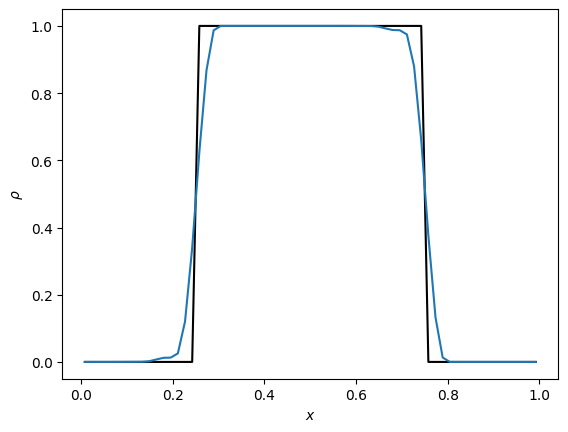

In [4]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(solver, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(solver, ax, "rho", cell_averaged=True, xlabel=True)